# 空间数据

空间数据又称几何数据，它用来表示物体的位置、形态、大小分布等各方面的信息，比如坐标上的点

SciPy 通过 scipy.spatial 模块处理空间数据，比如判断一个点是否在边界内、计算给定点周围距离最近点以及给定距离内的所有点

## 三角测量

三角测量在三角学与几何学上是一借由测量目标点与固定基准线的已知端点的角度，测量目标距离的方法

多边形的三角测量是将多边形分成多个三角形，我们可以用这些三角形来计算多边形的面积

拓扑学：任何曲面都存在三角剖分。假设曲面上有一个三角剖分， 把所有三角形的顶点总个数记为 p(公共顶点只看成一个)，边数记为 a，三角形的个数记为 n，则 e=p-a+n 是曲面的拓扑不变量。 也就是说不管是什么剖分，e 总是得到相同的数值。 e 被称为称为欧拉示性数

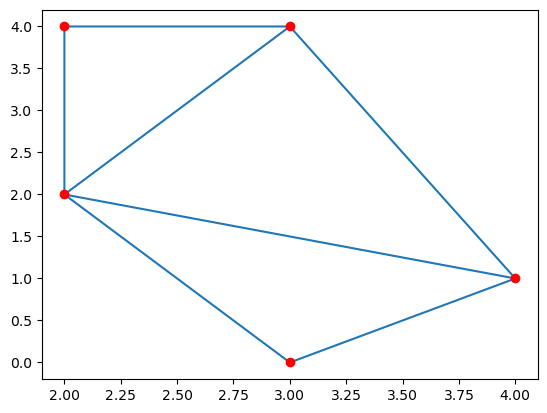

In [1]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1]
])

# 三角形中顶点的索引
# 三角形顶点的 id 存储在三角剖分对象的 simplices 属性中
simplices = Delaunay(points).simplices    

plt.triplot(points[:, 0], points[:, 1], simplices)
plt.scatter(points[:, 0], points[:, 1], color='r')

plt.show()

## 凸包

凸包（Convex Hull）是一个计算几何（图形学）中的概念

在一个实数向量空间 V 中，对于给定集合 X，所有包含 X 的凸集的交集 S 被称为 X 的凸包。X 的凸包可以用 X 内所有点(X1，...Xn)的凸组合来构造

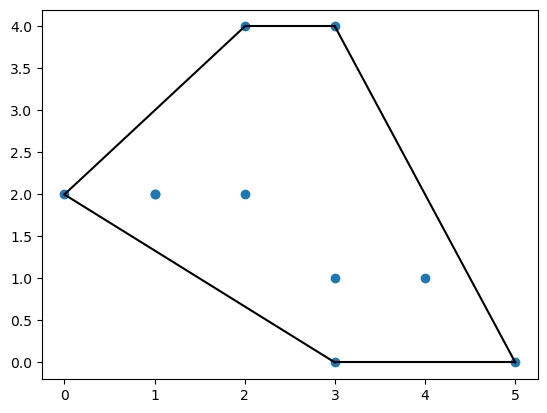

In [6]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1],
  [1, 2],
  [5, 0],
  [3, 1],
  [1, 2],
  [0, 2]
])

hull = ConvexHull(points)
hull_points = hull.simplices

plt.scatter(points[:,0], points[:,1])
for simplex in hull_points:
  plt.plot(points[simplex,0], points[simplex,1], 'k-')

plt.show()

## K-D树

kd-tree（k-dimensional树的简称），是一种对k维空间中的实例点进行存储以便对其进行快速检索的树形数据结构。主要应用于多维空间关键数据的搜索（如：范围搜索和最近邻搜索）

K-D 树可以使用在多种应用场合，如多维键值搜索（范围搜寻及最邻近搜索）

最邻近搜索用来找出在树中与输入点最接近的点

In [7]:
from scipy.spatial import KDTree

points = [(1, -1), (2, 3), (-2, 3), (2, -3)]

# 返回一个KDTree对象
kdtree = KDTree(points)

# 返回最近邻距离和最近邻位置
res = kdtree.query((1, 1))

print(res)

(2.0, 0)


## 距离矩阵

在数学中, 一个距离矩阵是一个各项元素为点之间距离的矩阵（二维数组）。因此给定 N 个欧几里得空间中的点，其距离矩阵就是一个非负实数作为元素的 N×N 的对称矩阵。

距离矩阵和邻接矩阵概念相似，其区别在于后者仅包含元素（点）之间是否有连边，并没有包含元素（点）之间的连通的距离的讯息。因此，距离矩阵可以看成是邻接矩阵的加权形式。

举例，二维点 a 至 f，把点所在像素之间的欧几里得度量作为距离度量
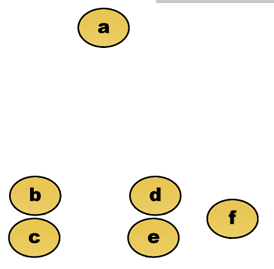

其距离矩阵为
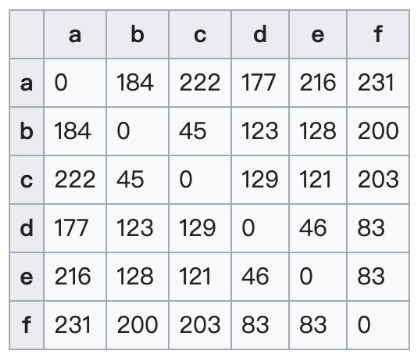

## 欧几里得距离

在数学中，欧几里得距离或欧几里得度量是欧几里得空间中两点间"普通"（即直线）距离。使用这个距离，欧氏空间成为度量空间。相关联的范数称为欧几里得范数。

欧几里得度量（euclidean metric）（也称欧氏距离）是一个通常采用的距离定义，指在m维空间中两个点之间的真实距离，或者向量的自然长度（即该点到原点的距离）。在二维和三维空间中的欧氏距离就是两点之间的实际距离。

In [8]:
# 查看给定点之间的欧几里得距离

from scipy.spatial.distance import euclidean

p1 = (1, 0)
p2 = (10, 2)

res = euclidean(p1, p2)

res

9.219544457292887

## 曼哈顿距离

曼哈顿距离（Manhattan Distance）是种使用在几何度量空间的几何学用语，用以标明两个点在标准坐标系上的绝对轴距总和。

曼哈顿距离 只能上、下、左、右四个方向进行移动，并且两点之间的曼哈顿距离是两点之间的最短距离。

曼哈顿与欧几里得距离： 红、蓝与黄线分别表示所有曼哈顿距离都拥有一样长度（12），而绿线表示欧几里得距离有6×√2 ≈ 8.48的长度。

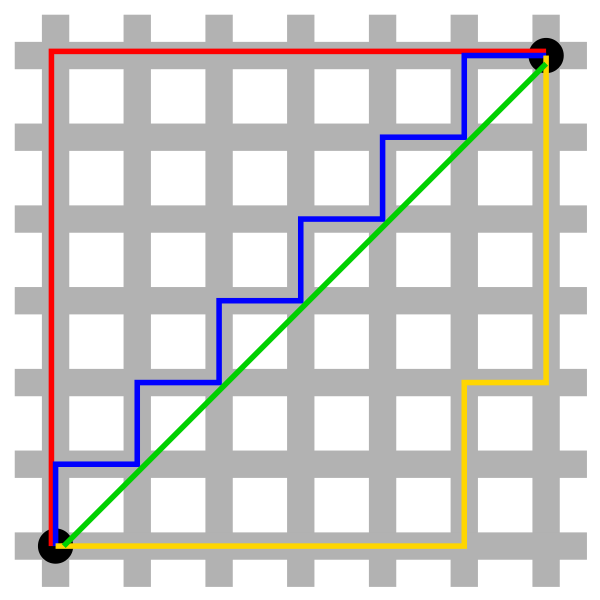

In [9]:
# 计算给定点之间的曼哈顿距离

from scipy.spatial.distance import cityblock

p1 = (1, 0)
p2 = (10, 2)

res = cityblock(p1, p2)

res

11

## 余弦距离

余弦距离，也称为余弦相似度，通过测量两个向量的夹角的余弦值来度量它们之间的相似性。

0 度角的余弦值是 1，而其他任何角度的余弦值都不大于 1，并且其最小值是 -1。

In [10]:
# 计算两点之间的余弦距离

from scipy.spatial.distance import cosine

p1 = (1, 0)
p2 = (10, 2)

res = cosine(p1, p2)

res

0.019419324309079777

## 汉明距离

在信息论中，两个等长字符串之间的汉明距离（英语：Hamming distance）是两个字符串对应位置的不同字符的个数。换句话说，它就是将一个字符串变换成另外一个字符串所需要替换的字符个数。

汉明重量是字符串相对于同样长度的零字符串的汉明距离，也就是说，它是字符串中非零的元素个数：对于二进制字符串来说，就是 1 的个数，所以 11101 的汉明重量是 4。

- 1011101与1001001之间的汉明距离是2
- 2143896与2233796之间的汉明距离是3
- "toned"与"roses"之间的汉明距离是3

In [11]:
# 计算两点之间的汉明距离

from scipy.spatial.distance import hamming

p1 = (True, False, True)
p2 = (False, True, True)

res = hamming(p1, p2)

res

0.6666666666666666